<a href="https://colab.research.google.com/github/NishthaSharma-22/Sentiment-Analysis-with-Playstore-reviews/blob/main/Nishtha_Intern_Task_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis for XYZ Company**
Classifying feedback from playstore as '**POSITIVE**' and '**NEGATIVE**' <br>
<br>
**Technologies used**:<br>
NLTK, Pandas, Sci-kit Learn, TF-IDF, Matplotlib, Seaborn

##1. Importing the dataset (from kaggle)

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hermionegranger22","key":"6452b8c26bc6774d01d39815313639a2"}'}

In [10]:
'''Making a directory for kaggle and copying the dataset to kaggle'''
!mkdir -p ~/.dataset_task0
!cp kaggle.json ~/.dataset_task0/

In [11]:
'''Setting file permissions'''
!chmod 600 ~/.dataset_task0/kaggle.json

In [12]:
'''Installing the kaggle API'''
!pip install kaggle

In [13]:
'''Downloading the given sample dataset for the project'''
!kaggle datasets download -d farhaouimouhamed/sentiment-analysis-datasetgoogle-play-app-reviews

Dataset URL: https://www.kaggle.com/datasets/farhaouimouhamed/sentiment-analysis-datasetgoogle-play-app-reviews
License(s): unknown
  0% 0.00/3.46M [00:00<?, ?B/s]
100% 3.46M/3.46M [00:00<00:00, 159MB/s]


In [17]:
'''Unzipping the zipped file'''
!unzip sentiment.zip

Archive:  sentiment.zip
  inflating: sentiment-analysis-dataset-google-play-app-reviews.csv  


##2. Data analysis

In [15]:
'''Importing the required libraries'''
import pandas as pd

In [19]:
df = pd.read_csv('sentiment.csv')

In [20]:
'''Quick overview of the dataset, see if there are any missing values'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16092 non-null  object
 1   userName              16092 non-null  object
 2   userImage             16092 non-null  object
 3   content               16092 non-null  object
 4   score                 16092 non-null  int64 
 5   thumbsUpCount         16092 non-null  int64 
 6   reviewCreatedVersion  13742 non-null  object
 7   at                    16092 non-null  object
 8   replyContent          7889 non-null   object
 9   repliedAt             7889 non-null   object
 10  sortOrder             16092 non-null  object
 11  appId                 16092 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.5+ MB


In [21]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOHNHm4OfbjkxEXXa51JwZEHAaDlvfSgN0OU256...,Lex S,https://lh3.googleusercontent.com/-FgDpDeEJLAw...,"I love this app, but I do have one major gripe...",1,3,5.2.0.23,2020-08-05 16:22:04,Any.do is not only a product but also a servic...,2020-08-05 08:02:08,most_relevant,com.anydo
1,gp:AOqpTOEujjLj56XVqumAkipImEqIAU3qTIuQjENPaOK...,Sam van Dijk,https://lh3.googleusercontent.com/-pO3wTIb4myA...,"Trash. Yes, it has some nice nifty features bu...",1,25,5.2.0.23,2020-07-21 22:17:25,"Premium users can edit, create and delete tags...",2020-07-23 15:57:51,most_relevant,com.anydo
2,gp:AOqpTOElISilniODwd6UBrqFngzTtDHLF-G0VLpR2_y...,Hugo Bounoua,https://lh3.googleusercontent.com/a-/AOh14GgxG...,"OMG the UI is awful, seriously you have popup ...",1,8,5.2.0.23,2020-07-22 07:23:35,The Premium ad only shows up when first openin...,2020-07-23 16:20:43,most_relevant,com.anydo
3,gp:AOqpTOEkZ75JR5CzVhxoxWa0XVmPanw_pEl1srcJ7yv...,Aishwarya Mishra,https://lh3.googleusercontent.com/a-/AOh14Ghhq...,I've been using the app for a while and since ...,1,20,5.2.0.23,2020-07-19 06:49:15,"Hi, due to new restrictions from Google, the p...",2020-07-22 14:05:56,most_relevant,com.anydo
4,gp:AOqpTOEtpLcODD_NZOBqR1N7DBbaLdw3Gyz3v3xZAp1...,Mad Scientist,https://lh3.googleusercontent.com/-kIZF4kMt6yY...,"Unable to register with an email. Clicking""con...",1,77,5.2.0.9,2020-07-10 17:59:22,We are unaware of any issues with signing in t...,2020-07-12 08:02:19,most_relevant,com.anydo


In [22]:
'''Only relevant data for sentiment analysis is contained in 'content' and 'score' columns
So removing the unnecessay ones and keeping only 2 useful columns:'''

df = df[['content', 'score']]
df.head()

,content,score
0,"I love this app, but I do have one major gripe...",1
1,"Trash. Yes, it has some nice nifty features bu...",1
2,"OMG the UI is awful, seriously you have popup ...",1
3,I've been using the app for a while and since ...,1
4,"Unable to register with an email. Clicking""con...",1


In [23]:
'''Checking to see the range of score, and see if the score distriution is even and nearly equal for all entries'''
print(df['score'].unique())
print(df['score'].value_counts())

[1 2 3 4 5]
score
3    5150
5    2920
4    2834
1    2642
2    2546
Name: count, dtype: int64


In [27]:
def label_sentiment(score):
  '''This function returns a sentiment corresponding to the score assigned'''
  if score >= 4:
        return 'POSITIVE'
  elif score <= 2:
        return 'NEGATIVE'
  else:
        return 'NEUTRAL'

df['sentiment'] = df['score'].apply(label_sentiment)
df = df[df['sentiment'] != 'NEUTRAL']

In [28]:
df.head()

,content,score,sentiment
0,"I love this app, but I do have one major gripe...",1,NEGATIVE
1,"Trash. Yes, it has some nice nifty features bu...",1,NEGATIVE
2,"OMG the UI is awful, seriously you have popup ...",1,NEGATIVE
3,I've been using the app for a while and since ...,1,NEGATIVE
4,"Unable to register with an email. Clicking""con...",1,NEGATIVE


##3. Data Preprocessing (with NLTK)

In [29]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
'''Lemmatizing the words so that the words important to the context are in the correct root form'''
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [32]:
def preprocess_text_nltk_lemmatize(text):
  '''Converts the text to lowercase, removes stopwords and makes sure the words are all alplhabetical. At the end, joins the processed text'''
  text = text.lower()

  words = word_tokenize(text)

  filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]

  cleaned_text = ' '.join(filtered_words)

  return cleaned_text

##4. Applying preprocessing to the 'content' column

In [33]:
'''Applying the function to content column to create a separate column, cleaned_column'''
df['cleaned_content'] = df['content'].apply(preprocess_text_nltk_lemmatize)
df.head()

,content,score,sentiment,cleaned_content
0,"I love this app, but I do have one major gripe...",1,NEGATIVE,love app one major gripe want option buy premi...
1,"Trash. Yes, it has some nice nifty features bu...",1,NEGATIVE,trash yes nice nifty feature lack complete nec...
2,"OMG the UI is awful, seriously you have popup ...",1,NEGATIVE,omg ui awful seriously popup premium every sec...
3,I've been using the app for a while and since ...,1,NEGATIVE,using app since last week acting weird receive...
4,"Unable to register with an email. Clicking""con...",1,NEGATIVE,unable register email clicking continue email ...


### Converting Data to numerical features (using TF-IDF)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
'''6000 features are just right to prevent overfitting while avoiding complexity'''
tfidf = TfidfVectorizer(max_features=6000)

In [ ]:
X = tfidf.fit_transform(df['cleaned_content']).toarray()

In [36]:
y = df['sentiment']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
df_filtered = df[df['sentiment'] != 'NEUTRAL']

X = df_filtered['cleaned_content']
y = df_filtered['sentiment']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (8753,)
Test data shape: (2189,)


##5. ML model (Logistic Regression)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [41]:
X_train_tfidf = tfidf.fit_transform(X_train)

X_test_tfidf = tfidf.transform(X_test)

In [42]:
model = LogisticRegression()

model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test_tfidf)

In [44]:
'''Classification report and accuracy of the model'''
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


              precision    recall  f1-score   support

    NEGATIVE       0.83      0.88      0.86       995
    POSITIVE       0.90      0.85      0.88      1194

    accuracy                           0.87      2189
   macro avg       0.87      0.87      0.87      2189
weighted avg       0.87      0.87      0.87      2189

Accuracy: 0.87


##6. Visualizing the results

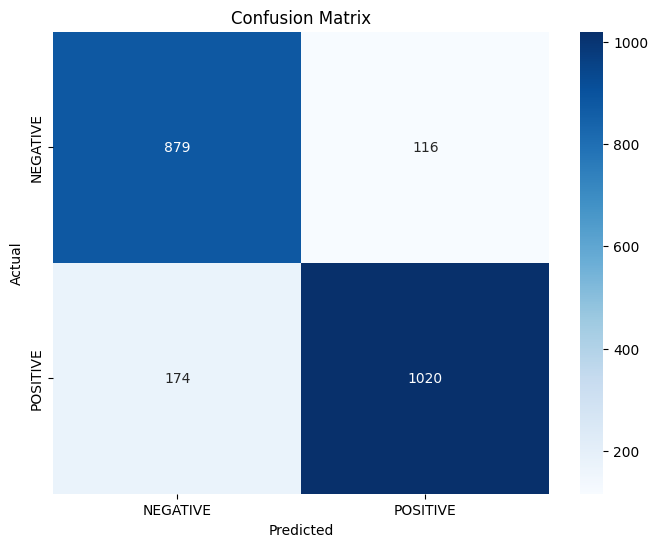

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NEGATIVE', 'POSITIVE'], yticklabels=['NEGATIVE', 'POSITIVE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

##7. Evaluating using Naive Bayes

Using Naive Bayes model on the same dataset to see if it yields better accuracy than Logistic Regression

              precision    recall  f1-score   support

    NEGATIVE       0.84      0.83      0.83       995
    POSITIVE       0.86      0.87      0.86      1194

    accuracy                           0.85      2189
   macro avg       0.85      0.85      0.85      2189
weighted avg       0.85      0.85      0.85      2189

Accuracy: 0.85


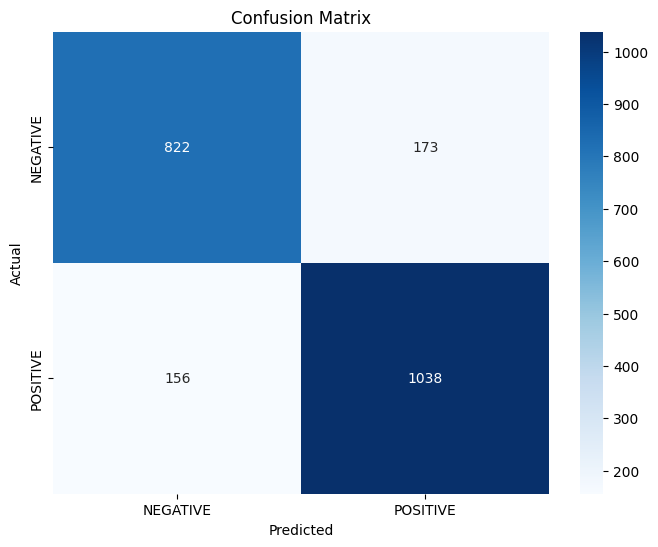

In [46]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NEGATIVE', 'POSITIVE'], yticklabels=['NEGATIVE', 'POSITIVE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Accuracy using ***Logistic Regression***: **87%** <br>
Using ***Naive Bayes***: **85%**

#Testing with custom input reviews

In [50]:
sample_review = "I love how useful this app is."
sample_review_cleaned = preprocess_text_nltk_lemmatize(sample_review)
sample_review_tfidf = tfidf.transform([sample_review_cleaned])
sample_prediction = model.predict(sample_review_tfidf)
print(f'Sample Review Prediction: {sample_prediction[0]}')

Sample Review Prediction: POSITIVE
